From Seth Cohen, a lonely card game puzzle:

On snowy afternoons, you like to play a solitaire “game” with a standard, randomly shuffled deck of 52 cards. You start dealing cards face up, one at a time, into a pile. As you deal each card, you also speak aloud, in order, the 13 card faces in a standard deck: ace, two, three, etc. (When you get to king, you start over at ace.) You keep doing this until the rank of the card you deal matches the rank you speak aloud, in which case you lose. You win if you reach the end of the deck without any matches.

What is the probability that you win?

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
%matplotlib inline

Let's play this game 50000 times and see how many times I reach to the end.

1. shuffle the deck 5 times (even I shuffle the deck the last time I played)
2. start counting, and if I got a match, I mark down the position (out of 52) and stop, and start another round.
3. count how many times I reach to 1, 2, ..., 52.

In [17]:
base = np.arange(1,14)
allcards = np.repeat(base,4) # new deck, same number will be in together
# create a vector that I use to count from 1 to 13 and then back to 1
counting = (np.vstack((base,base,base,base))).flatten()
simTime = 50000
result = []
for ii in range(simTime):
    shuffle(allcards);shuffle(allcards);shuffle(allcards);shuffle(allcards)
    shuffle(allcards)
    for position,count in enumerate(counting):
        #print(count,',',allcards[position],end='; ')
        if count == allcards[position]:
            result.append(position+1)
            #print('make it to %d' %(position + 1),'finish')
            break
        else:
            continue

In [18]:
unique, counts = np.unique(result, return_counts=True)
print(unique,counts)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52] [3872 3510 3187 2987 2782 2544 2362 2076 2066 1828 1733 1580 1449 1378 1329
 1132 1050  946  929  879  806  749  670  609  591  534  539  430  426  406
  359  316  299  264  243  239  220  176  198  179  166  154  134  134  110
   95   98   77  100   68   67   67]


Showed as the figure below, obviously, the number of times I reach to each position is approximately a exponential distribution or a poisson distribution. 

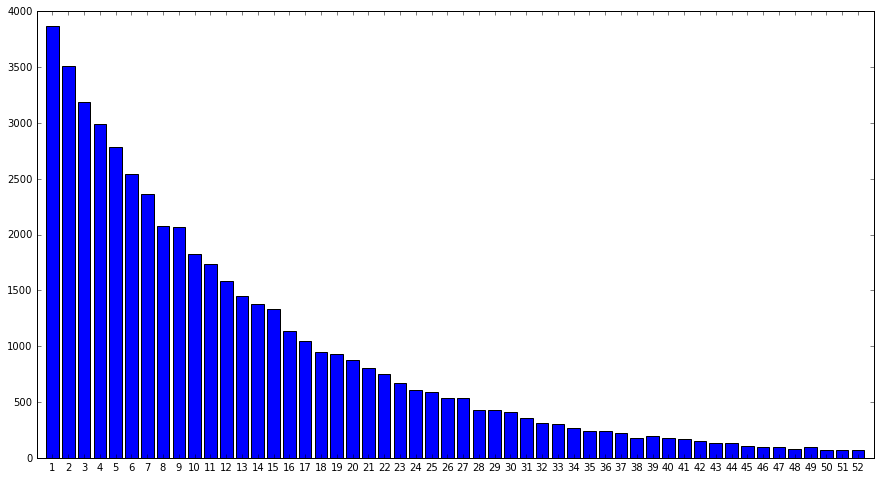

In [19]:
fig,ax = plt.subplots(figsize=(15,8))
ax.bar(unique,counts,align='center')
_=ax.set(xlim=(0,53),xticks=unique)

Based on what we talked about above, we could simulate this for 500 times, and in each simulation, we play this game 10000 times. In the end, we could have a nice distribution of the probability we will win this game. 

In [20]:
doTime = 500
simTime = 10000
allResult = []
for jj in range(doTime):
    result = []
    for ii in range(simTime):
        shuffle(allcards);shuffle(allcards);shuffle(allcards);shuffle(allcards)
        shuffle(allcards)
        for position,count in enumerate(counting):
            #print(count,',',allcards[position],end='; ')
            if count == allcards[position]:
                result.append(position+1)
                #print('make it to %d' %(position + 1),'finish')
                break
            else:
                continue
    unique, counts = np.unique(result, return_counts=True)
    allResult.append(counts)

In [21]:
probs=[]
for a in allResult:
    prob = a[-1] / np.sum(a)
    probs.append(prob)

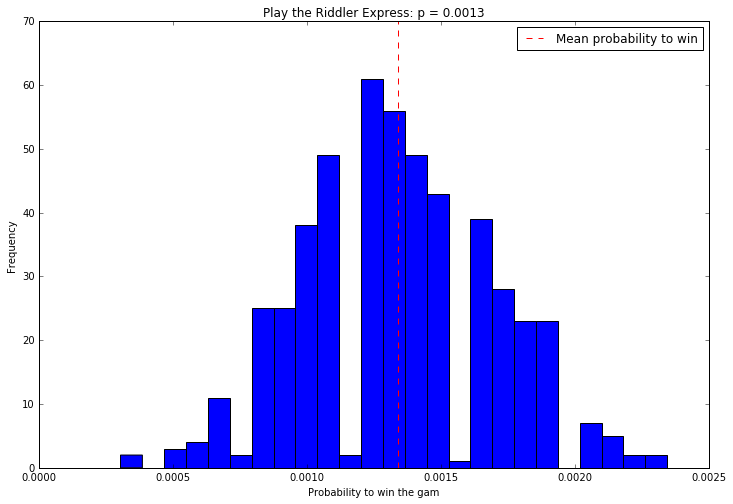

In [27]:
fig,ax = plt.subplots(figsize=(12,8))
_=ax.hist(probs,bins=25)
_=ax.axvline(np.mean(probs),color='r',linestyle='--',label='Mean probability to win')
_=ax.set(xlabel='Probability to win the gam',ylabel='Frequency',
        title='Play the Riddler Express: p = %.4f'%np.mean(probs),)
ax.legend(loc='best')

It is strange that there are some downs in this distribution and it stays there for same reason. However, I believe the simulation is correct and gives us a nice guess about the winning probability: 0.0013 